In [10]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from gfos.data.utils import load_layout

In [3]:
data_root = r"H:\data\gfos\predict-ai-model-runtime\npz_all\npz\layout"
data_root = Path(data_root)

In [6]:
xla_default = load_layout(data_root, compile_type="default", model_type="xla")
xla_random = load_layout(data_root, compile_type="random", model_type="xla")


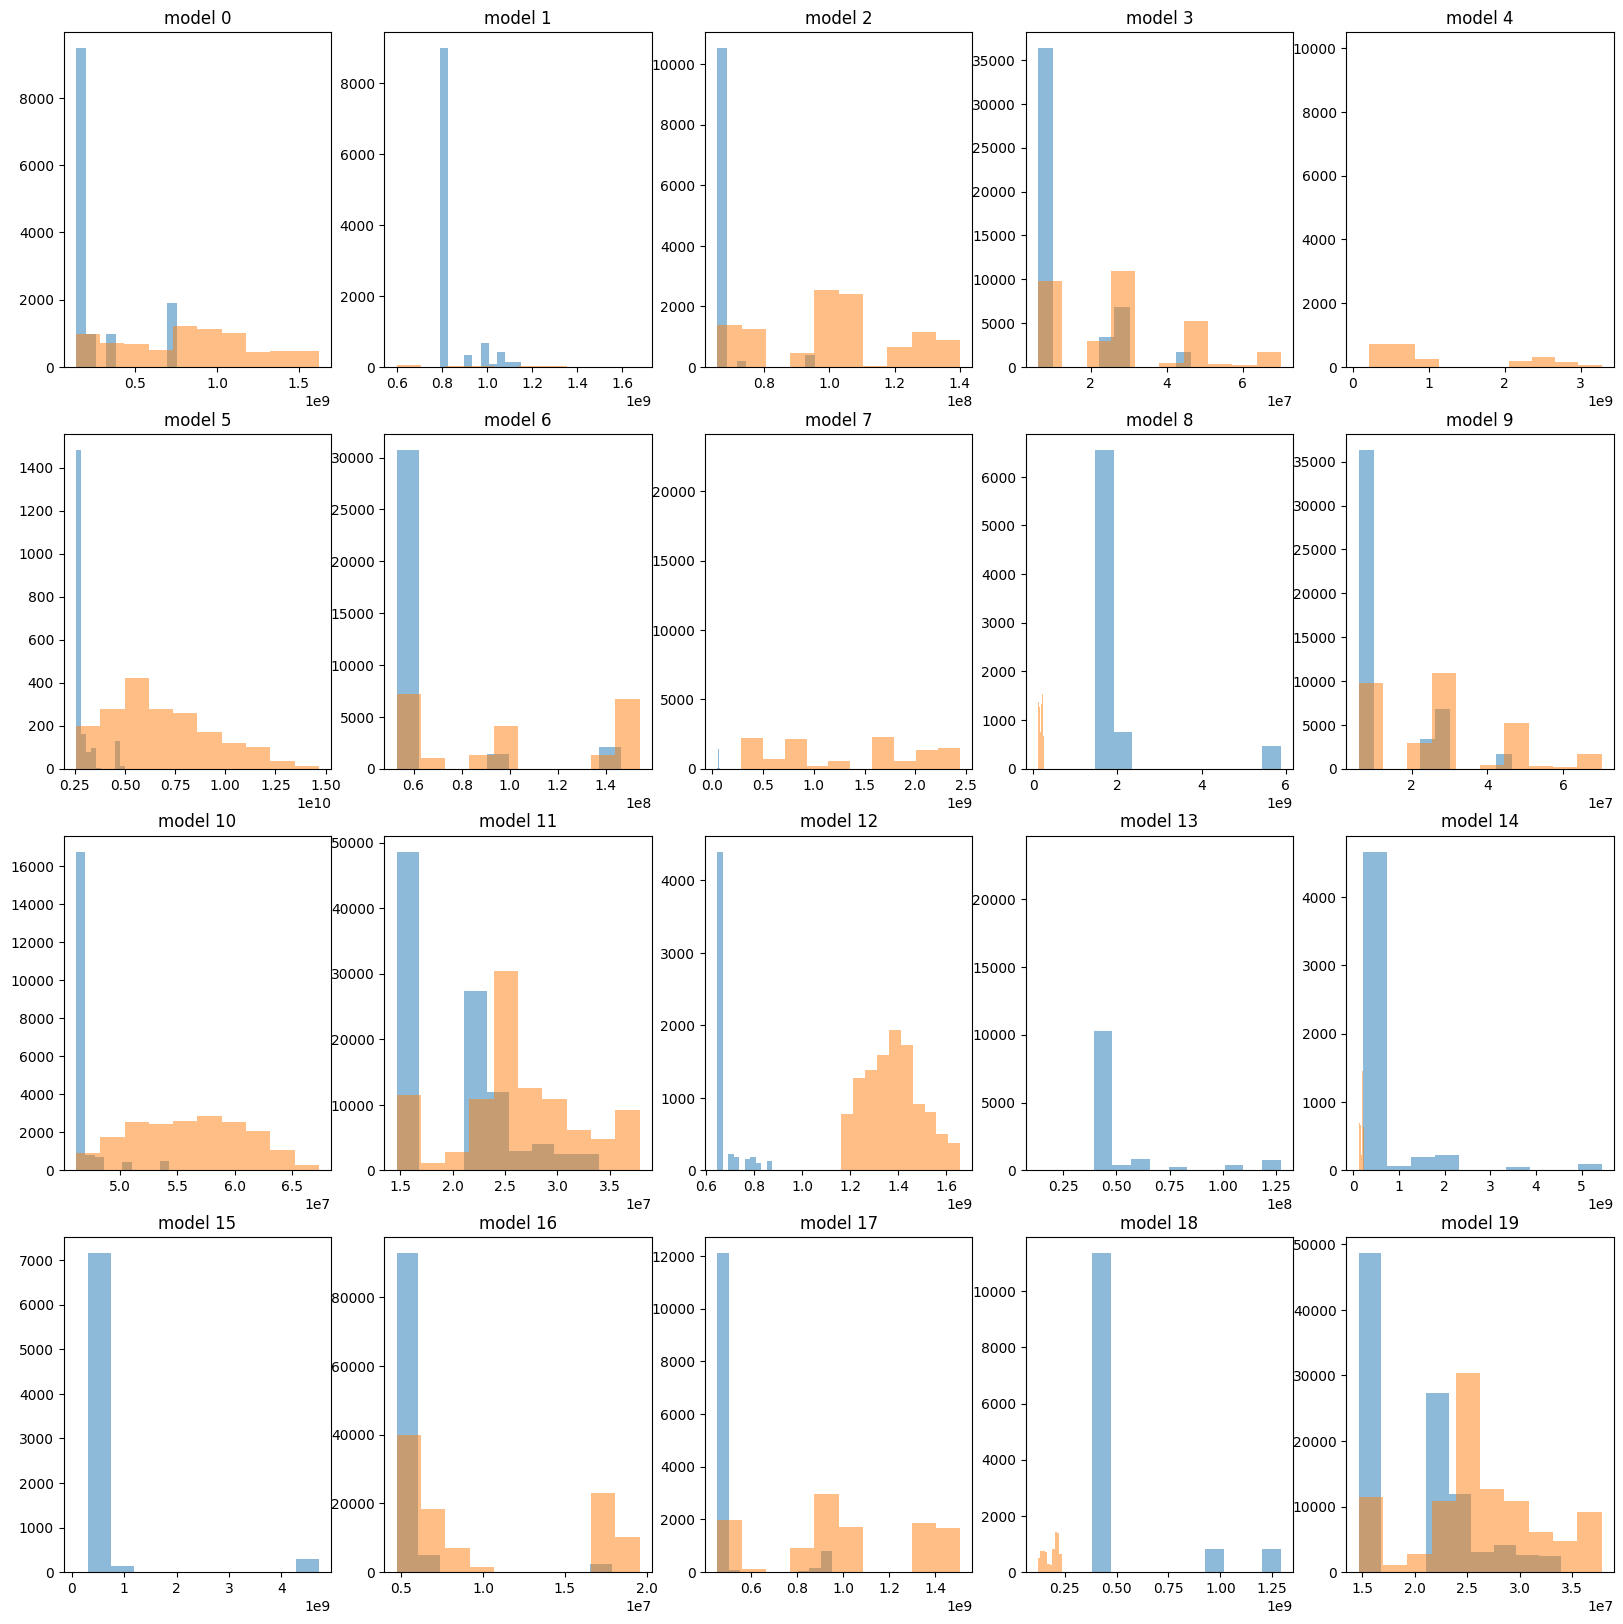

In [14]:
axes = plt.subplots(4, 5, figsize=(20, 20))[1].flatten()

for i, idx in enumerate(np.random.choice(len(xla_default["train"]), 20)):
    model_default = np.load(xla_default["train"][idx])
    model_random = np.load(xla_random["train"][idx])

    axes[i].hist(model_default["config_runtime"], alpha=0.5)
    axes[i].hist(model_random["config_runtime"], alpha=0.5)
    axes[i].set_title(f"model {i}")


In [ ]:
from gfos.data.dataset import LayoutDataset, Normalizer

norm_path = "../../data/normalizer.json"
default_dataset = LayoutDataset(xla_default["train"], max_configs=4000, num_configs=128, normalizer=Normalizer.from_json(norm_path , source="xla", search="default"))
random_dataset = LayoutDataset(xla_random["train"], max_configs=4000, num_configs=128, normalizer=Normalizer.from_json(norm_path , source="xla", search="random"))